In [1]:
# standard modules
import seaborn as sns
import pandas as pd
import numpy as np
import os
#import math

# Modules for Displaying Figures
import matplotlib.pyplot as plt
import scipy.stats as stats


# Data Science Modules 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# My modules
import src.acquire as ac
import src.prepare as pp
import src.helper as helper
import src.evaluate as evaluate

# Turn off the red warnings
import warnings
warnings.filterwarnings("ignore")

The following datasets are available:
telco


In [2]:
telco = ac.get_telco_data()

In [14]:
# running a function which determines which way to default our target variable
# We are using the 'churn' variable as target because we are attempting to predict
print(f"Baseline accuracy is {round(evaluate.baseline(telco, 'churn')*100,2)}%")

Baseline accuracy is 73.46%


In [3]:
x_train, y_train, x_validate, y_validate, x_test, y_test = pp.model_telco_data(telco)

In [76]:
def baseline(var):
    if (telco[var].value_counts(normalize=True))[1] > (telco[var].value_counts(normalize=True))[0]:
        baseline = (telco[var].value_counts(normalize=True))[1]
    else: 
        baseline = (telco[var].value_counts(normalize=True))[0]
    return baseline

#print(f"Baseline accuracy = {round(baseline*100,2)}%") 

In [10]:
# Create the decision tree object and specify hyperparams
# this specifies our algorithm
algorithm1 = DecisionTreeClassifier(max_depth = 3, random_state = 7)

In [12]:
# this step creates model1
model1 = algorithm1.fit(x_train, y_train)

In [15]:
# use model1
# first, evaluate x_train and filling y_predictions with the evaluation
y_predictions = model1.predict(x_train)

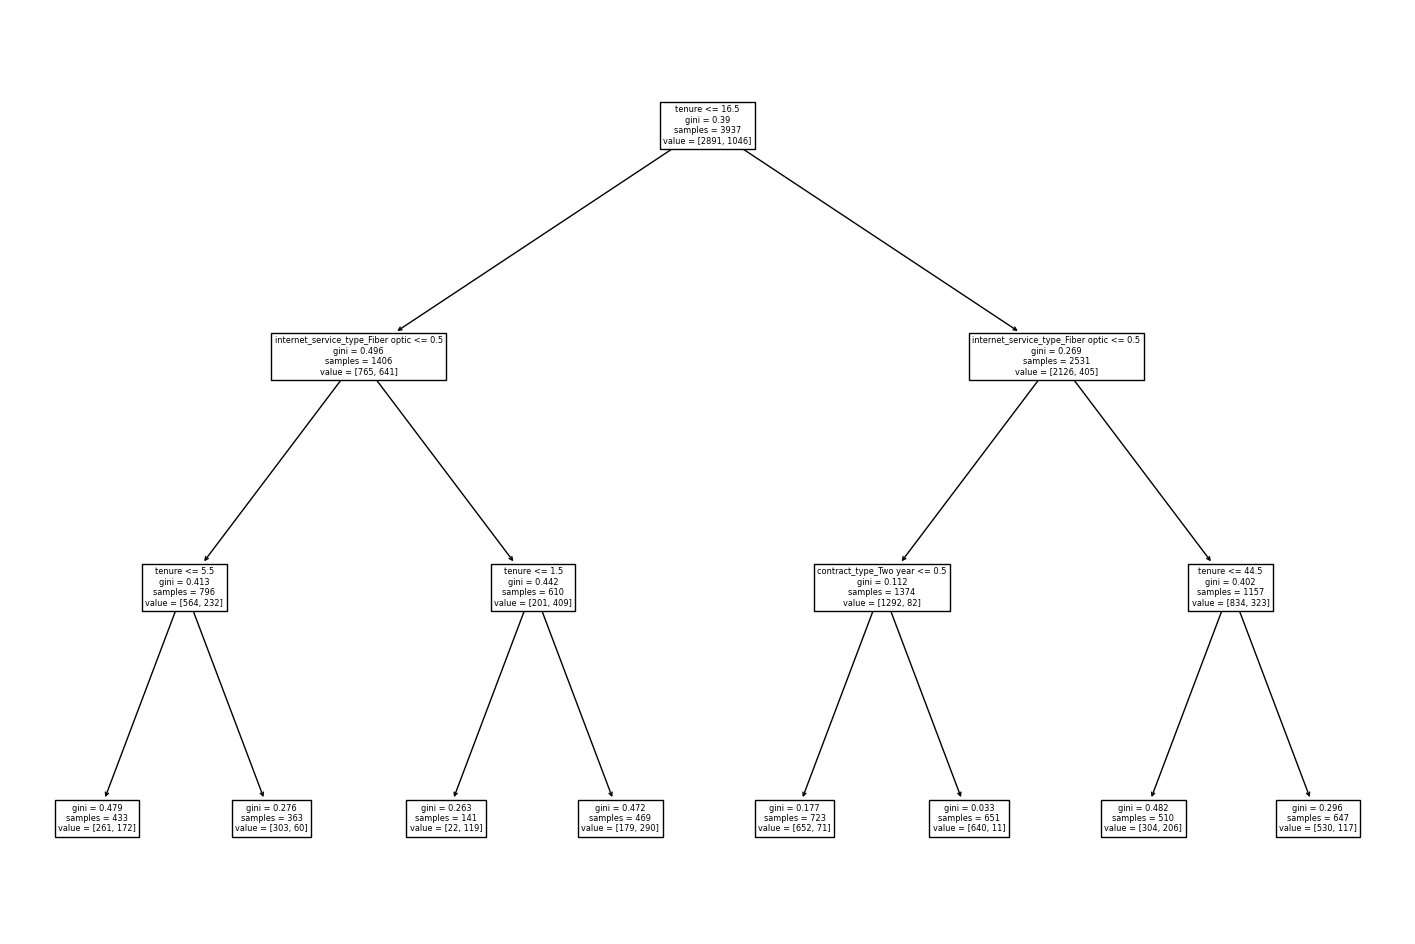

In [29]:
plt.figure(figsize=(18,12))
plot_tree(model1, feature_names=x_train.columns)
plt.show()
# plot_tree option class_names=['perish','survive']

In [31]:
print('Decision tree model 1 has an accuracy rate of :',round(model1.score(x_train, y_train)*100,2),'%')

Decision tree model 1 has an accuracy rate of : 78.71 %


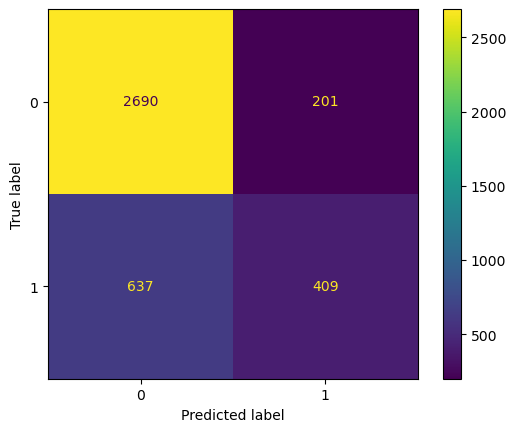

In [33]:
plot_confusion_matrix(model1, x_train, y_train)

In [34]:
t_report = classification_report(y_train, y_predictions, output_dict=True)
print('Model1 Tree of 1 depth')
pd.DataFrame(t_report)

Model1 Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.808536,0.670492,0.787148,0.739514,0.771860
recall,0.930474,0.391013,0.787148,0.660744,0.787148
f1-score,0.865230,0.493961,0.787148,0.679596,0.766590
support,2891.000000,1046.000000,0.787148,3937.000000,3937.000000


In [38]:
train_predict = {
    'model': [],
    'accuracy': [],
    'true_positive_rate': [],
    'false_positive_rate': [],
    'true_negative_rate': [],
    'false_negative_rate': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'support_0': [],
    'support_1': []
}

TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
ALL = TP + TN + FP + FN

accuracy = (TP + TN)/ALL
true_positive_rate = TP/(TP+FN)
false_positive_rate = FP/(FP+TN)
true_negative_rate = TN/(TN+FP)
false_negative_rate = FN/(FN+TP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

train_predict['model'].append(f'Model1')
train_predict['accuracy'].append(accuracy)
train_predict['true_positive_rate'].append(true_positive_rate)
train_predict['false_positive_rate'].append(false_positive_rate)
train_predict['true_negative_rate'].append(true_negative_rate)
train_predict['false_negative_rate'].append(false_negative_rate)
train_predict['precision'].append(precision)
train_predict['recall'].append(recall)
train_predict['f1_score'].append(f1_score)
train_predict['support_0'].append(support_pos)
train_predict['support_1'].append(support_neg)
    
train_predict = pd.DataFrame(train_predict).T

In [39]:
train_predict

,0
model,Model1
accuracy,0.787148
true_positive_rate,0.391013
false_positive_rate,0.069526
true_negative_rate,0.930474
false_negative_rate,0.608987
precision,0.670492
recall,0.391013
f1_score,0.493961
support_0,1046


In [41]:
# Producing several decision trees to figure out maximum useful depth

for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=7)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(x_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734315     0.0  0.734315     0.367158      0.539219
recall        1.000000     0.0  0.734315     0.500000      0.734315
f1-score      0.846807     0.0  0.734315     0.423404      0.621824
support    2891.000000  1046.0  0.734315  3937.000000   3937.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.808536     0.670492  0.787148     0.739514      0.771860
recall        0.930474     0.391013  0.787148     0.660744      0.787148
f1-score      0.865230     0.493961  0.787148     0.679596      0.766590
support    2891.000000  1046.000000  0.787148  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.808536     0.670492  0.787148     0.739514      0.771860
recall        0.930474     0.391013  0.787148     0.660744      0.787148

In [42]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=7)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_accuracy = tree.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.787148,0.793246,-0.006099
2,3,0.787148,0.793246,-0.006099
3,4,0.788672,0.789100,-0.000428
4,5,0.796038,0.800355,-0.004318
5,6,0.806706,0.795024,0.011682
6,7,0.822962,0.787915,0.035047
7,8,0.837948,0.784953,0.052995
8,9,0.855982,0.780806,0.075176
9,10,0.880874,0.774882,0.105992


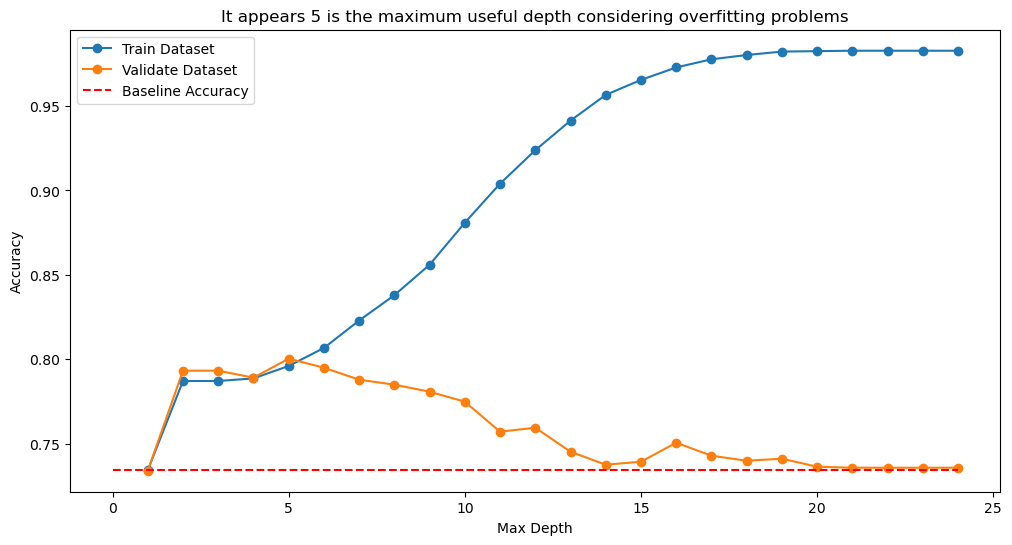

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train Dataset')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate Dataset')
plt.title('It appears 5 is the maximum useful depth considering overfitting problems')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.hlines(baseline('churn'), 0, 24, color= 'red', label= 'Baseline Accuracy', linestyle = 'dashed')
plt.legend()
plt.show()

In [47]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy','difference'],ascending = [False, True])

,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.796038,0.800355,-0.004318
5,6,0.806706,0.795024,0.011682
1,2,0.787148,0.793246,-0.006099
2,3,0.787148,0.793246,-0.006099
3,4,0.788672,0.789100,-0.000428
6,7,0.822962,0.787915,0.035047
7,8,0.837948,0.784953,0.052995
8,9,0.855982,0.780806,0.075176
0,1,0.734315,0.734005,0.000311


In [69]:
baseline('churn')

0.7346301292063041

### Max Depth of 5 is selected as the decision tree to move to testing. 

- Testing the 5 depth tree model

In [79]:
# Make the model
tree = DecisionTreeClassifier(max_depth=5, random_state=7)

# Fit the model (on train and only train)
final_model = tree.fit(x_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
#in_sample_accuracy = tree.score(x_train, y_train)

final_model_accuracy = tree.score(x_test, y_test)
y_predictions = final_model.predict(x_test)
report = classification_report(y_test, y_predictions, output_dict=True)
#print(final_model_accuracy)
#print(pd.DataFrame(report))

In [84]:
print(f'{round(final_model_accuracy*100,2)}%')
print(pd.DataFrame(report))

77.9%
                     0           1  accuracy    macro avg  weighted avg
precision     0.829982    0.600639  0.778962     0.715310      0.769019
recall        0.878993    0.502674  0.778962     0.690834      0.778962
f1-score      0.853785    0.547307  0.778962     0.700546      0.772319
support    1033.000000  374.000000  0.778962  1407.000000   1407.000000


In [4]:

telco['churn'].count

<bound method Series.count of 0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: churn, Length: 7043, dtype: object>